In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import nest
import nest.topology as topo # import topology as a submodule of nest
import nest.raster_plot
import numpy as np

In [22]:
nest.ResetKernel()

In [23]:
'''extension of the grid'''

#ext = 2. # here we use a square layer of size (ext x ext)
ext_hc = 640. # 640 micrometers of diameter in each HC
ext_mc_l = ext_hc/4. # 160 micrometers of lenght in each MC
ext_mc_w = ext_hc/3. # 160 micrometers of width in each MC

'''number of neurons and layers'''

n_pyr=30                             #pyramidal neurons in each minicolumn
n_bc=24                              #basket cells in each hypercolumn
n_top=192                            #number of minicolumns (12 in each of the 16 hypercolumns)
n_hc=16                              #number of hypercolumns

''''''

n=-1
m=0
p1=[0]*(n_top/n_hc)
p2=[0]*n_hc
pos1=[0]*(n_top*n_pyr)

#position of the center of each pyramidal neuron layer

for i in range (n_hc):
    if (i%4==0):
        n=n+1
    for j in range (3):
        p1[j]=(j+0.5)*ext_mc_w+n*ext_hc
        for k in range (4):
            p2[k]=(k+0.5)*ext_mc_l+(i%4)*ext_hc
            for l in range (n_pyr):
                pos1[m] = [p1[j]+np.random.uniform(-ext_mc_w/2.,ext_mc_w/2.), p2[k]+np.random.uniform(-ext_mc_l/2.,ext_mc_l/2.)]
                m=m+1
                


In [24]:
#for i in range(4320,4680):
#    print pos1[i]

In [25]:
'''position of all the basket cells in the model'''

n=-1
k=0
l=0
p3=[0]*(n_hc/4)
p4=[0]*(n_hc/4)
pos2=[0]*(n_hc*n_bc)

#position of each basket cell: pos2

for i in range (4):
    if (i%4==0):
        n=n+1
    p3[i]=(i+0.5)*ext_hc
    for j in range (4):
        p4[j]=(j+0.5)*ext_hc
        for l in range (n_bc):    
            pos2[k] = [p3[i]+np.random.uniform(-ext_hc/2.,ext_hc/2.), p4[j]+np.random.uniform(-ext_hc/2.,ext_hc/2.)]
            k=k+1


In [26]:
#for i in range (96,120):
#    print pos2[i]

In [27]:
hc_pyr=[0]*(n_hc)
hc_bc=[0]*(n_hc)
mc=[0]*n_top

'''dividing the pyramical neurons in groups of 360 neurons (the number in each HC)'''
for i in range (n_hc):
    hc_pyr[i]= [pos1[j] for j in range (i*n_pyr*n_top/n_hc,(i+1)*n_pyr*n_top/n_hc)]

    
'''dividing the basket cells in groups of 24 neurons'''
for i in range (n_hc):
    hc_bc[i]= [pos2[j] for j in range (i*n_bc,(i+1)*n_bc)]
    


In [28]:
#print hc_pyr[1]
#print hc_bc[3]

In [29]:
layer_pyr = [0]*n_hc
for i in range(n_hc):
    layer_pyr[i] = {
        'extent': [10*4.*ext_hc, 10*4.*ext_hc],
        'positions': hc_pyr[i],
        #'elements': 'iaf_neuron'
        'elements': 'aeif_cond_alpha'  #adaptative exponential integrate and firing as neuron model
    }

layer_bc = [0]*n_hc
for i in range (n_hc):
    layer_bc[i] = {
        'extent': [10*4.*ext_hc, 10*4.*ext_hc],#without the 10 there is a error saying "node position outside of layer
        'positions': hc_bc[i],
        #'elements': 'iaf_neuron'
        'elements': 'aeif_cond_alpha'  #adaptative exponential integrate and firing as neuron model
    }
#print layer_bc[5]

In [30]:
#type(layer_bc[3])

In [31]:
mc=[0]*n_hc
hc=[0]*n_hc
for i in range (n_hc):
    mc[i]=(topo.CreateLayer(layer_pyr[i]))  #creating the layer with 360 Pyr
    hc[i]=(topo.CreateLayer(layer_bc[i]))  #creating the layer with 24 bc


In [32]:
#type(mc[0])

In [33]:
#print mc

In [34]:
conn_pb = 0.7  #probability of connecting between pyramidal cell and basket cell 
conn_bp = 0.7  #probability of connecting between basket cell and pyramidal cell
conn_pp = 0.2  #probability of connecting between pyramidal cell and pyramidal cell 

conn_pb = {
    'connection_type': 'divergent',
    'mask': {'rectangular': {'lower_left': [-0., -0.], 'upper_right': [2560.,2560.]},
             'anchor': [1280.0, 1280.0]},
    'kernel': conn_pb,
    'allow_autapses': False
}

conn_bp = {
    'connection_type': 'divergent',
    'mask': {'rectangular': {'lower_left': [-0., -0.], 'upper_right': [2560.,2560.]},
             'anchor': [1280.0, 1280.0]},
    'kernel': conn_bp,
    'allow_autapses': False
}

conn_pp = {
    'connection_type': 'divergent',
    'mask': {'rectangular': {'lower_left': [-0., -0.], 'upper_right': [2560.,2560.]},
             'anchor': [1280.0, 1280.0]},
    'kernel': conn_pp,
    'allow_autapses': False
}



In [35]:
#type(hc[0])

In [36]:
#connect each HC with 12 MC and vice-versa

for i in range(n_hc):
    for j in range (n_hc):
        if (i==j):
            topo.ConnectLayers(hc[i], mc[j], conn_bp)
            topo.ConnectLayers(mc[i], hc[j], conn_pb)

In [37]:
#connect each MC with all MC:            

for i in range(n_hc):
    for j in range (i):
        topo.ConnectLayers(mc[i], mc[j], conn_pp)

In [ ]:
#################

'''
I guess I fixed everything until here, but I still can't plot the layers to see if it's all right. I will take
a break and will finish it in the afternoon.
'''

#################

In [38]:
# make a copy of the poisson_generator model and specify the rate
nest.CopyModel('poisson_generator', 'my_poisson_generator', {'rate': 200000.} )
ext=2.
noise_layer_dict = {
    'extent': [ext_hc, ext_hc],
    'positions': [[0.0, 0.0]],
    'elements': 'my_poisson_generator'
}

noiselayer = (topo.CreateLayer(noise_layer_dict))

for j in range(n_hc):  #connect layer to poisson generator
    topo.ConnectLayers(noiselayer, mc[j], conn_pp)

ValueError: need more than 0 values to unpack

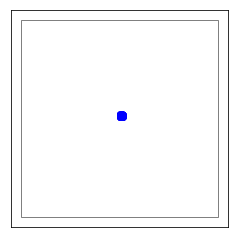

In [40]:
layer = mc[0]
conn_dict = conn_pp

fig = topo.PlotLayer(layer)
ctr = topo.FindCenterElement(noiselayer) # extract GID of poisson generator
topo.PlotTargets(ctr, layer, fig=fig, mask=conn_dict['mask'], mask_color='green',
                 src_size=2, src_color='red',
                 tgt_size=2, tgt_color='red')
   
# beautify
#pylab.axes().set_xticks(pylab.arange(-ext_hc*4., ext_hc*4., 0.640))
#pylab.axes().set_yticks(pylab.arange(-ext_hc*4., ext_hc*4., 0.640))
pylab.grid(True)
print(ctr)

In [496]:
################################################################
######         TRYING TO FIX THE NEXT STEPS        #############
################################################################

In [377]:
ext = 2. # here we use a square layer of size (ext x ext)
n_pyr=30  #pyramidal neurons in each minicolumn
n_bc=24 #basket cells in each hypercolumn

#position of each pyramidal neuron
pos1 = [[np.random.uniform(-ext/2,ext/2), np.random.uniform(-ext/2,ext/2)] for j in range(n_pyr)]

#position of each basket cell
pos2 = [[np.random.uniform(-ext/2,ext/2), np.random.uniform(-ext/2,ext/2)] for j in range(n_bc)]

layer_pyr = {
    'extent': [ext, ext],
    'positions': pos1,
    #'elements': 'iaf_neuron'
    'elements': 'aeif_cond_alpha'  #adaptative exponential integrate and firing as neuron model
}

layer_bc = {
    'extent': [ext, ext],
    'positions': pos2,
    #'elements': 'iaf_neuron'
    'elements': 'aeif_cond_alpha'  #adaptative exponential integrate and firing as neuron model
}

In [378]:
n_top=192                            #number of minicolumns (12 in each of the 16 hipercolumns)
n_hc=16                              #number of hypercolumns

mc=[0]*n_top
for i in range (n_top):            #create the minicolumns with pyramidal cells    #using range (0,n_top-1) is iqual to range(n_top-1)
    mc[i]=topo.CreateLayer(layer_pyr)
    
hc=[0]*n_hc                          #number of hipercolumns
for i in range (n_hc):             #create the hypercolumns with basket cells
    hc[i]=topo.CreateLayer(layer_bc)

In [379]:
conn_pb = 0.7  #probability of connecting between pyramidal cell and basket cell 
conn_bp = 0.7  #probability of connecting between basket cell and pyramidal cell
conn_pp = 0.2  #probability of connecting between pyramidal cell and pyramidal cell 

conn_pb = {
    'connection_type': 'divergent',
    'mask': {'rectangular': {'lower_left': [-1., -1.], 'upper_right': [1.,1.]},
             'anchor': [0.0, 0.0]},
    'kernel': conn_pb,
    'allow_autapses': False
}

conn_bp = {
    'connection_type': 'divergent',
    'mask': {'rectangular': {'lower_left': [-1., -1.], 'upper_right': [1.,1.]},
             'anchor': [0.0, 0.0]},
    'kernel': conn_bp,
    'allow_autapses': False
}

conn_pp = {
    'connection_type': 'divergent',
    'mask': {'rectangular': {'lower_left': [-1., -1.], 'upper_right': [1.,1.]},
             'anchor': [0.0, 0.0]},
    'kernel': conn_pp,
    'allow_autapses': False
}



# rectangular mask, constant kernel, non-centered anchor
#conn2 = {
#    'connection_type': 'divergent',
#    'mask': {'rectangular': {'lower_left': [-1., -1.], 'upper_right': [1.,1.]},
#             'anchor': [0.0, 0.0]
#             },
#    'kernel': 0.75,
#    'allow_autapses': False
#}

# rectangular mask, constant kernel, non-centered anchor
#conn2 = {
#    'connection_type': 'divergent',
#    'mask': {'rectangular': {'lower_left': [-1., -1.], 'upper_right': [1.,1.]},
#             'anchor': [0.0, 0.0]},
#    'kernel': {'uniform': {'min':0.,'max':1.}},
#    'allow_autapses': False
#}


#
#
#
#EVERYTHING RIGHT UNTIL HERE!
#
#
#

In [380]:
#connect each HC with 12 MC

for i in range(n_hc-1):
    for j in range (n_top-1):
        if (i+j)%(n_hc)==0:
            topo.ConnectLayers(hc[i], mc[j], conn_bp)
            
#connect each MC with all MC:            

for i in range(n_top-1):
    for j in range (i):
        if i!=j:
            topo.ConnectLayers(mc[i], mc[j], conn_pp)
            

##I couldn't test this part yet, but I think it's ok.

In [19]:
# make a copy of the poisson_generator model and specify the rate
nest.CopyModel('poisson_generator', 'my_poisson_generator', {'rate': 200000.} )
ext=2.
noise_layer_dict = {
    'extent': [ext_hc, ext_hc],
    'positions': [[0.0, 0.0]],
    'elements': 'my_poisson_generator'
}

noiselayer = (topo.CreateLayer(noise_layer_dict))

for j in range(n_hc):  #connect layer to poisson generator
    topo.ConnectLayers(noiselayer, mc[j], conn_pp)

In [382]:
noiselayer = (topo.CreateLayer(noise_layer_dict))

In [383]:
type (noise_layer_dict)

dict

In [384]:
print noiselayer

(9963,)


In [473]:
for j in range(0,n_top-1):  #connect layer to poisson generator
    topo.ConnectLayers(noiselayer, mc[j], conn_pp)

NESTError: ArgumentType in ConnectLayers: The type of the first parameter did not match the argument(s) of this function.

NESTError: DictError in get_d: Key '/topology' does not exist in dictionary.

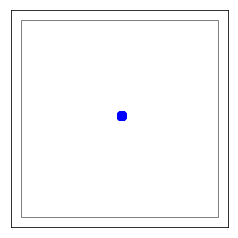

In [491]:
layer = mc[0]
conn_dict = conn_pp

fig = topo.PlotLayer(layer)
ctr = topo.FindCenterElement(noiselayer) # extract GID of poisson generator
topo.PlotTargets(ctr, layer, fig=fig, mask=conn_dict['mask'], mask_color='green',
                 src_size=250, src_color='red',
                 tgt_size=20, tgt_color='red')
   
# beautify
pylab.axes().set_xticks(pylab.arange(-ext_hc*4., ext_hc*4., 0.640))
pylab.axes().set_yticks(pylab.arange(-ext_hc*4., ext_hc*4., 0.640))
pylab.grid(True)
print(ctr)